# How to use LangChain and Azure OpenAI with Python


Langchain is an open source framework for developing applications using large language models (LLM). <br>

This guide will demonstrate how to setup and use Azure OpenAI models' API with LangChain.
    

## Set Up
The following libraries must be installed to use LangChain with Azure OpenAI.<br>

In [21]:
# INSTALLATION
%pip install openai
%pip install langchain
%pip install langchain-openai

# this is only for loading images, not for the ai part
%pip install imageio


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.1 MB/s eta 0:00:0031m15.7 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## API Configuation and Deployed Model Setup

After installing the necessary libraies, the API must be configured. The code below shows how to configure the API directly in your Python environment. 


In [2]:
# This is only for troubleshooting purposes if there are issues with versions
%pip show openai
%pip show langchain
%pip show langchain-openai


Name: openai
Version: 1.60.0
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: anyio, distro, httpx, jiter, pydantic, sniffio, tqdm, typing-extensions
Required-by: langchain-openai
Note: you may need to restart the kernel to use updated packages.
Name: langchain
Version: 0.3.15
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: aiohttp, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 
Note: you may need to restart the kernel to use updated packages.
Name: langchain-openai
Version: 0.3.1
Summary: An integration package connecting OpenAI and

In [60]:
import openai
import json
import os
# Please note that AzureChatOpenAI langchain is not anymore in langchain.chat-models but in langchain_openai
from langchain_openai import AzureChatOpenAI
from langchain.schema import HumanMessage
from langchain import LLMChain


# Load config values
with open(r'config.json') as config_file:
    config_details = json.load(config_file)

# The base URL for your Azure OpenAI resource. e.g. "https://<your resource name>.openai.azure.com"
openai_api_base=config_details['OPENAI_API_BASE']
    
# API version e.g. "2023-07-01-preview"
openai_api_version=config_details['OPENAI_API_VERSION']

# The name of your Azure OpenAI deployment chat model. e.g. "gpt-35-turbo-0613"
deployment_name=config_details['DEPLOYMENT_NAME']

# The API key for your Azure OpenAI resource.
openai_api_key = config_details['OPENAI_API_KEY']
# openai_api_key = os.getenv("OPENAI_API_KEY")

# This is set to `azure`
openai_api_type="azure"

## Deployed Model Setup

In [61]:
# Create an instance of chat llm
llm = AzureChatOpenAI(
    azure_endpoint=openai_api_base,    
    openai_api_version=openai_api_version,
    deployment_name=deployment_name,    
    api_key=openai_api_key,
    openai_api_type=openai_api_type,
)

llm([HumanMessage(content="Write me a poem")])

AIMessage(content="In the hush of dawn's first light,  \nWhispers dance in morning's sight.  \nA world adorned in dew's embrace,  \nAwakens with a gentle grace.  \n\nThe sky unfurls in hues of gold,  \nStories of the night retold.  \nEach leaf and branch, a quiet prayer,  \nBreathing secrets in the air.  \n\nRivers hum a soft refrain,  \nCarving paths through hill and plain.  \nMountains stand with ancient pride,  \nGuardians of the earth so wide.  \n\nIn meadows where the wildflowers play,  \nJoyful colors greet the day.  \nA symphony of life unspooled,  \nWhere sunlit patterns are gently pooled.  \n\nAs twilight casts its velvet guise,  \nStars ignite the evening skies.  \nThe moon, a watchful eye above,  \nBathes the world in silvery love.  \n\nIn the cycle, ever turning,  \nLessons learned and hearts discerning.  \nA dance of shadows and of light,  \nThe endless poem of day and night.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 211

## Load a file

This should do a very basic prompting of what we are trying to do in our view operation.

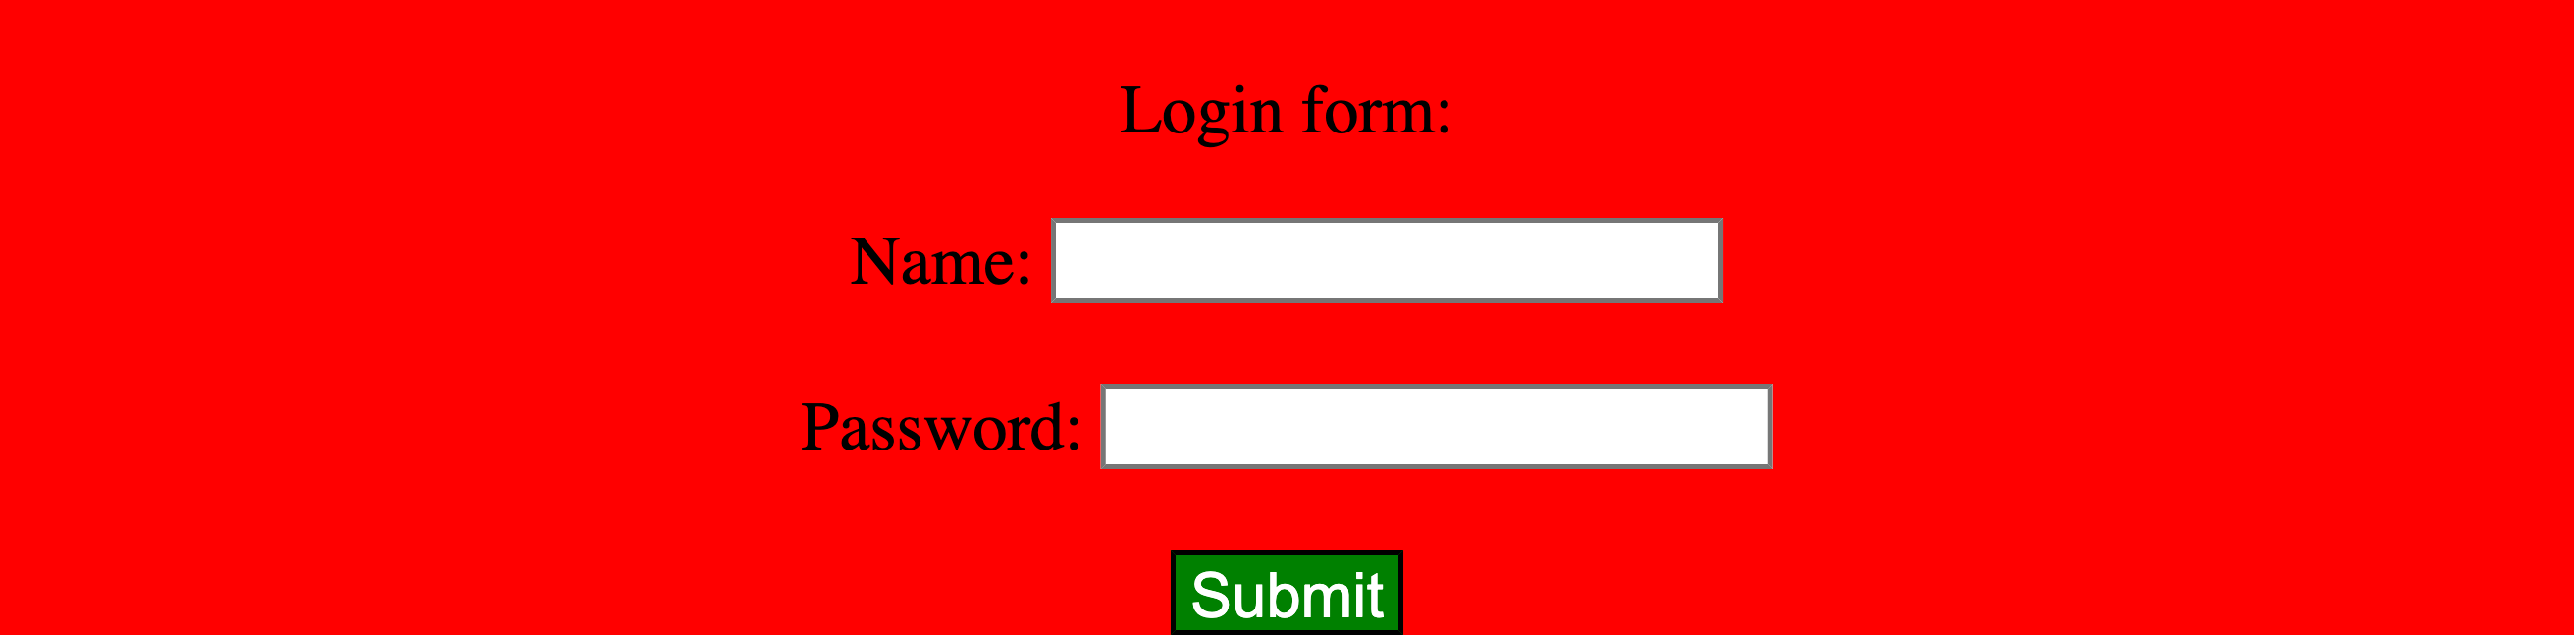

In [66]:
from IPython.display import display
from PIL import Image
import os
import base64

notebook_path = os.getcwd()

image_subpath = "images/screenShotPoc.png"

path=f"{notebook_path}/{image_subpath}"
display(Image.open(path))

# Encode the image to a base64 string.
# the decode("utf-8") is critical or the image is not passed correctly to the llm (and nobody likes 400 bad request)
with open(path, "rb") as img:
    base64_encoded_image = base64.b64encode(img.read()).decode("utf-8") 



## Prompt With an input image

Create a prompt that can be used with an input of the image

In [67]:
from langchain import PromptTemplate

from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

# Example 1 copied from https://predictivehacks.com/get-started-with-langchain-prompt-templates/

level = "Beginner"
distance = 40
duration = "1 hour"

system_template = "You are an experienced running coach"
system_message_prompt =  SystemMessagePromptTemplate.from_template(system_template)


human_template = "I would like to participate in a {distance} race. My level is {level} and I would like a training program for {duration}"
human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)


chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

request = chat_prompt.format_prompt(level=level, distance=distance, duration=duration).to_messages()

result = llm(request)

print(result)

content="It's great that you're interested in participating in a race, even if it's a short one like a 40-meter dash! As a beginner, focus on building your running form, speed, and overall conditioning. Since you've allocated one hour for training, I'll create a program that includes a warm-up, specific exercises to improve your sprinting ability, and a cool-down. You can use this routine several times a week for the best results, ensuring you have rest or active recovery days in between.\n\n**Training Program (1 Hour):**\n\n1. **Warm-Up (10-15 minutes):**\n   - **Dynamic stretches:** Perform each for 30 seconds.\n     - Leg swings (front-to-back and side-to-side)\n     - Arm circles (small and large)\n     - High knees\n     - Butt kicks\n   - **Light jogging:** 5 minutes at an easy pace to increase your heart rate and blood flow to your muscles.\n\n2. **Drills and Form Work (10 minutes):**\n   - Focus on maintaining good posture, landing on the forefoot/midfoot, and driving your knee

In [68]:
from langchain import PromptTemplate

from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
# Example 2 derivative with an image"


system_template = "You are a very helpful and patient ai"
system_message_prompt =  SystemMessagePromptTemplate.from_template(system_template)

human_message_prompt = HumanMessagePromptTemplate.from_template(
    input_variables=["encoded_image_url"], 
    template=[
        {"type": "text", "text": "Summarize this image"},
        {
            "type": "image_url",
            # this is based on https://medium.com/vectrix-ai/image-extraction-with-langchain-and-gemini-a-step-by-step-guide-02c79abcd679
            "image_url": {"url": f"data:image/png;base64,{base64_encoded_image}"},
        },
    ]
)

chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

request = chat_prompt.format_prompt(encoded_image_url = base64_encoded_image).to_messages()

result = llm(request)

print(result)



content='The image is of a login form set against a red background. It includes fields to enter a "Name" and "Password", with a "Submit" button below, highlighted in green.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 657, 'total_tokens': 695, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f3927aa00d', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_result': {'jailbreak': {'filtered': False, 'detected': False}, 'custom_blocklists': {'filtered': False, 'details': []}}}, {'prompt_index': 1, 'content_filter_result': {'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}, 'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered'

## PromptTemplates

Langchain provides a built in PromptsTemplate module to simplify the construction of prompts to get more specific answers.

In [36]:
from langchain import PromptTemplate

from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)


# First Example
template = """
You are a skin care consulant that recommends products based on customer
needs and preferences.

What is a good {product_type} to help with {customer_request}?
"""

prompt = PromptTemplate(
input_variables=["product_type", "customer_request"],
template=template,
)

print("Example #1:")
print(llm([HumanMessage(content=prompt.format(
        product_type="face wash",
        customer_request = "acne prone skin"
    ))]
))
print("\n")

# Second Example
system_message = "You are an AI assistant travel assistant that provides vacation recommendations."

system_message_prompt = SystemMessagePromptTemplate.from_template(system_message)
human_template="{text}"
human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)
chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

chain = llm | chat_prompt

result = chain.invoke("Where should I go on vaction in Decemember for warm weather and beaches?")

print("Example #2:")
print(result)

Example #1:
content="For acne-prone skin, it's important to look for a face wash that helps control oil, exfoliates gently, and contains ingredients known to combat acne. Here are a few recommendations:\n\n1. **CeraVe Renewing SA Cleanser**:\n   - Contains salicylic acid for exfoliation and acne reduction.\n   - Also includes ceramides and hyaluronic acid to maintain moisture and skin barrier.\n\n2. **La Roche-Posay Effaclar Medicated Gel Cleanser**:\n   - Contains salicylic acid to clear breakouts.\n   - Tested for sensitive skin and recommended by dermatologists.\n\n3. **Neutrogena Oil-Free Acne Wash**:\n   - Contains salicylic acid to help prevent future breakouts.\n   - Offers a gentle yet effective cleaning experience.\n\n4. **Paula's Choice CLEAR Pore Normalizing Cleanser**:\n   - Contains salicylic acid and is free from common irritating ingredients.\n   - Helps reduce pores and prevent new blemishes from forming.\n\n5. **Aveeno Clear Complexion Foaming Cleanser**:\n   - Contain

## Chains
There are many applications of chains that allow you to combine numerous LLM calls and actions.  <br>

### Simple Sequential Chains  <br>
Allow you to feed the output of one LLM Chain as input for another.

In [6]:
from langchain.chains import SimpleSequentialChain

In [15]:
description_template = """Your job is to come up with a fun DIY project for the specified gender, age, and description of a kid.
% CHILD_DESCRIPTION
{child_description}

YOUR RESPONSE:
"""
description_prompt_template = PromptTemplate(input_variables=["child_description"], template=description_template)

description_chain = LLMChain(llm=llm, prompt=description_prompt_template)

In [16]:
diy_description_template = """Given a DIY project, give a short and simple recipe step-by-step guide on how to complete the project and a materials list.
% DIY_PROJECT
{diy_project}

YOUR RESPONSE:
"""
diy_prompt_template = PromptTemplate(input_variables=["diy_project"], template=diy_description_template)

diy_chain = LLMChain(llm=llm, prompt=diy_prompt_template)

In [18]:
overall_chain = SimpleSequentialChain(chains=[description_chain, diy_chain], verbose=True)

In [19]:
review = overall_chain.invoke("5-year-old girl")



> Entering new SimpleSequentialChain chain...
**DIY Project: Magical Fairy Garden**

**Objective:** To create a magical, miniature fairy garden that will spark imagination and creativity in a 5-year-old girl.

**Materials Needed:**
- A large, shallow container or planter
- Potting soil
- Assorted small plants or succulents
- Small fairy figurines (available at craft stores or online)
- Miniature garden accessories (e.g., tiny furniture, fairy houses, pebbles, and toadstools)
- Colored craft stones or gravel
- Small twigs or sticks
- Child-friendly paint and brushes
- Glitter (optional)
- Craft glue

**Instructions:**

1. **Choose the Container:** Select a wide, shallow container or planter for your fairy garden. It could be a large flowerpot, a wooden crate, or even an old baking dish. Ensure it has drainage holes.

2. **Prepare the Base:** Fill the container with potting soil, leaving about an inch from the top. This will be the base of your garden.

3. **Select the Plants:** Choose